<a href="https://colab.research.google.com/github/Renan-Domingues/Learn-PyTorch-in-a-day-Daniel-Bourk/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow


In [ ]:
what_we_covering = {1: "data (prepare and load)",
                    2: "buid a model",
                    3: "fitting the model to data (training",
                    4: "make predictions and evaluating a model",
                    5: "saving and loading a model",
                    6: "putting it all toguether"

}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorches buiding blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.0.0+cu118'

### DATA  (preparing and loading)

# machine learning is a game of 2 parts:
1. get data into a numerical representation.
2. Buid a model to learn patterns in that numerical representation.

We'll use a linear regression formula to make a straight line with know parameters.

In [ ]:
# create *know* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step  = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### split data into training and test sets (one of the most important concepts in machine learning)

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",  s=4, label="Trainig_data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14});

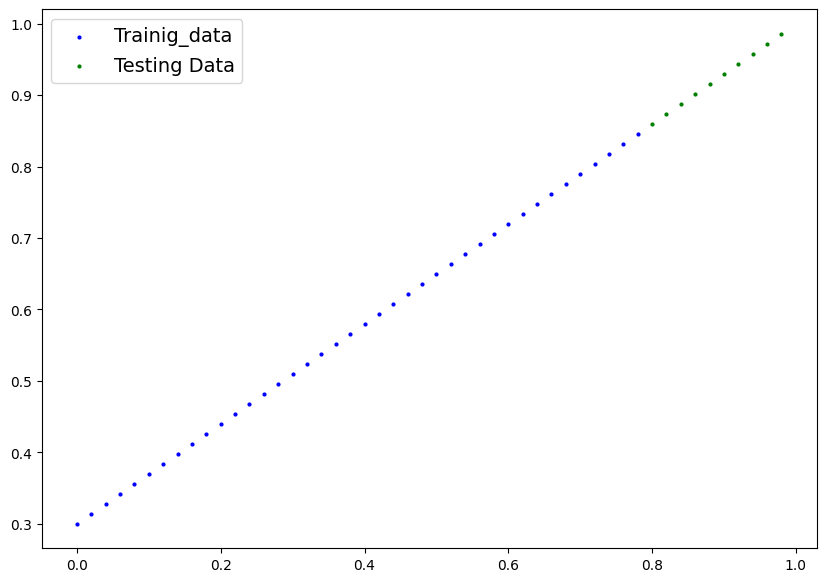

In [ ]:
plot_predictions();

## Build Model

Our first PyTorch model!

what this model does?

* Start with a random values (weight and bias)
* Looking at training data and adjust the training values (the weight and values we use to create the data)

how does it do so?

throught two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn
## Create a linear regression model class

class LinearRegressionModel(nn.Module): #<- Almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x +  self.bias  # this is the line regression formula

### PyTorch model buiding essential

* torch.nn - contains All the buidings blocks for computation graphs (a neural networks can be considered a computationaç graph).assert
* torch.nn.Parameter - What parameters shoud our model try to learn, often a PyTorch layer from  torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overright forward().
* torch.optim - Where the PyTorch optimizers live, they will help if the gradient descent
* def forward() - All nn.Module subclasses required you to overwrite forward(), this method defines what happens in the foward computation

###Check content of our PyTcharm model

Now we've create a model, let's see inside

so we can check our models parameters or what is inside our model using `parameters()`.

In [ ]:
# Create a Random Seed
torch.manual_seed(42)

# Create a instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Make prediction using `torch.inference_mode()`
To check our model's predictive power, lets see how predicts `y_test`based on `X_test`
When we pass data through model, it's going to run it through the `forward()` method.


In [ ]:
# Make predictions with models

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

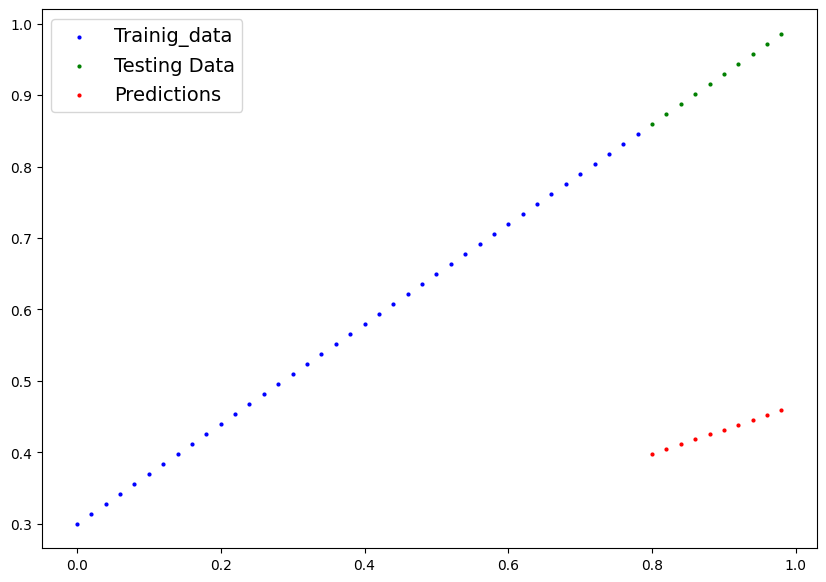

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

the whole idea of training is for a model to move from the unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas.

* **Loss function:** A function to measure how wrong your model's predctions are to the ideal outputs, lower is better

Things we need to train:
* Loss function: a function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* Optimizer: Takes into account the loss of a model and adjust the model's paramters (e. g. weight and bias in our case) to improve the loss function

And especific to PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup a optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learnid rate

### Buiding a training loop and a testing loop in PyTorch

A couple of things we need in training loop:
0. loop through the data
1. Forward pass - Data moving through our model's `forwad()` functions, to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer the zero grad
4. Loss Backward - moves back through the network to claculate the gradients of each of the parameters of our model with respect to the loss (Backpropagation)
5.Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (Gradient descent)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# track diferent values
epoch_count = []
loss_values = []
test_loss_values = []

### Training

# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gredients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next interation of the loop

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():  # turns off gradient traking and a couple more things behind the scenes
    #1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss {test_loss}")
    # Print model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

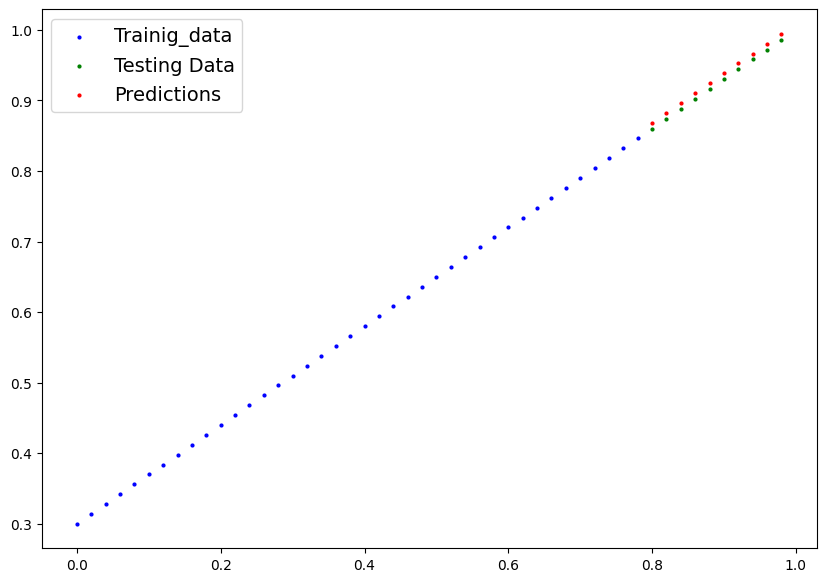

In [ ]:
plot_predictions(predictions=y_preds_new);

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading a model in PyTorch.

1. `torch.save()` - allows to  save a PyTorch object in pythons pickle format.
2. `torch.load()` - allows you load a PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

In [ ]:
# Saving PyTorch model
from pathlib import Path

# 1. Crate models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state_dict

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 May 12 14:02 01_pytorch_workflow_model_0.pth


In [ ]:
# Loading a  PyTorch model
# To load in a save state_dict we have to istantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together...

Lest's go back to the step above and see it all in one place

In [ ]:
# Import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.0.0+cu118'

. Create device-agnostic code.
This means if we got access to a GPU, our code will use it (for potentially fast computing).

if no GPU is avalable, the code will default to use CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

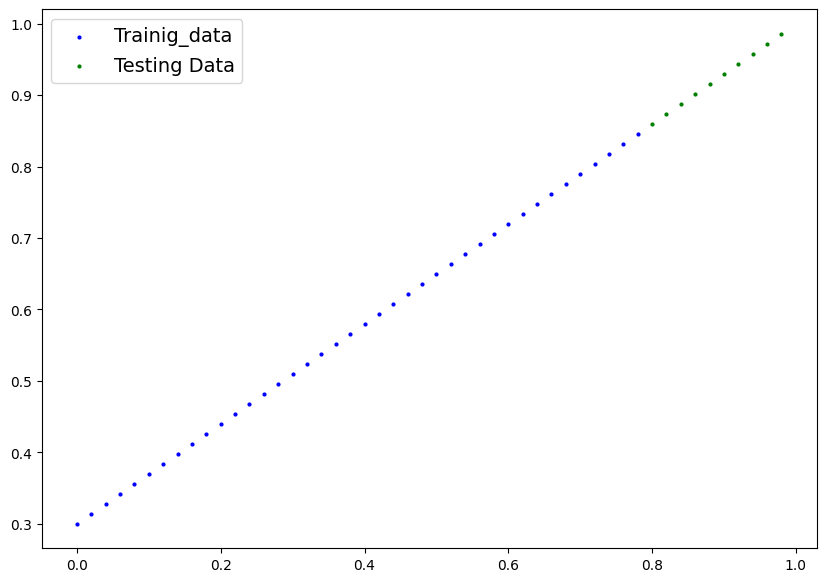

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [ ]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
For Training we need:

* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Loss Function
loss_fn  = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
### Training loop

torch.manual_seed(42)

epochs = 200

# Put data on the target device agnostic-code
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Optimizer a step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch 140 

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making and evaluating predictions

In [ ]:
# turn model into evaluation mode
model_1.eval()

#Make predictions on the testing data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

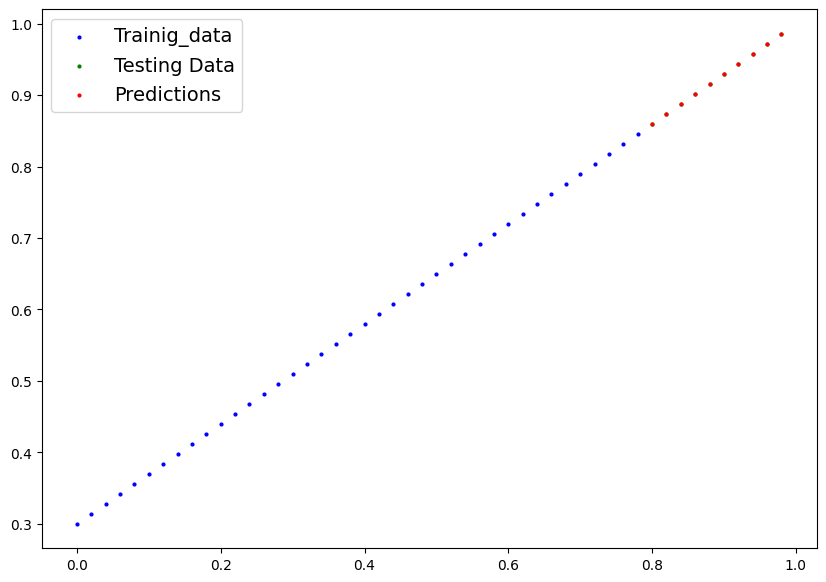

In [ ]:
# Check out our model predictions visualy
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save pat
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save de model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a pytorch model

# Criar uma nova instancia
loaded_model_1 = LinearRegressionModelV2()

# Loaded the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()). device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')